<a href="https://colab.research.google.com/github/RizqiRHuda/PVCK_Semester5/blob/main/week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MODUL 6 – Histogram, Histogram Equalization, Dithering**

### Nama         : Rizqi Rohmatul Huda
### Kelas        : TI-3C
### Nomor Absen  : 21
### NIM          : 2141720264

## **Tugas Praktikum**

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import Library**

In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

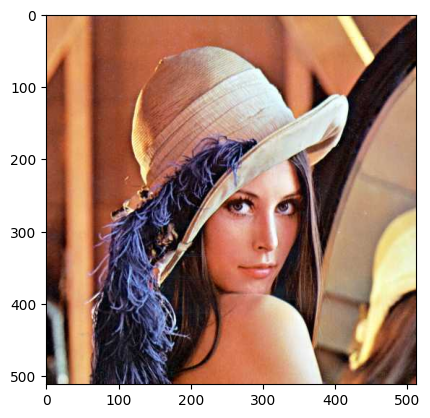

In [4]:
image_lena = cv.imread('/content/drive/MyDrive/img_python/Images/lena.jpg')
image = cv.cvtColor(image_lena, cv.COLOR_BGR2RGB)
plt.imshow(image)

3. Code berdasarkan flowchart

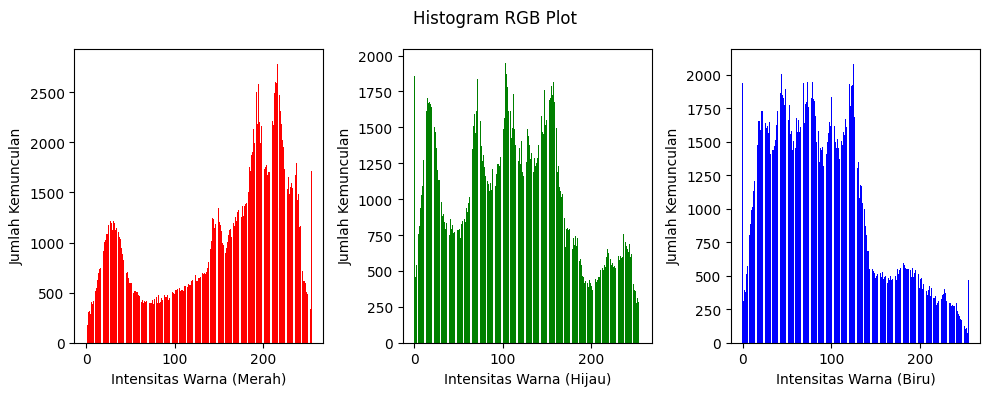

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calculate_histogram(channel):
    """Menghitung histogram untuk satu kanal warna."""
    hist, bins = np.histogram(channel.flatten(), 256, [0, 256])
    return hist, bins

# Baca gambar
image_path = '/content/drive/MyDrive/img_python/Images/lena.jpg'
image = cv2.imread(image_path)

# Pisahkan kanal warna (R, G, B)
b, g, r = cv2.split(image)

# Menghitung histogram untuk masing-masing kanal warna
hist_r, bins_r = calculate_histogram(r)
hist_g, bins_g = calculate_histogram(g)
hist_b, bins_b = calculate_histogram(b)

# Membuat histogram citra untuk masing-masing kanal warna
plt.figure(figsize=(10, 4))
plt.suptitle('Histogram RGB Plot')  # Judul utama

# Plot histogram untuk kanal Merah (R)
plt.subplot(131)
plt.bar(range(256), hist_r, color='red', alpha=1)
plt.ylabel('Jumlah Kemunculan')
plt.xlabel('Intensitas Warna (Merah)')

# Plot histogram untuk kanal Hijau (G)
plt.subplot(132)
plt.bar(range(256), hist_g, color='green', alpha=1)
plt.ylabel('Jumlah Kemunculan')
plt.xlabel('Intensitas Warna (Hijau)')

# Plot histogram untuk kanal Biru (B)
plt.subplot(133)
plt.bar(range(256), hist_b, color='blue', alpha=1)
plt.ylabel('Jumlah Kemunculan')
plt.xlabel('Intensitas Warna (Biru)')

plt.tight_layout()
plt.show()


4. Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan
hasilnya.

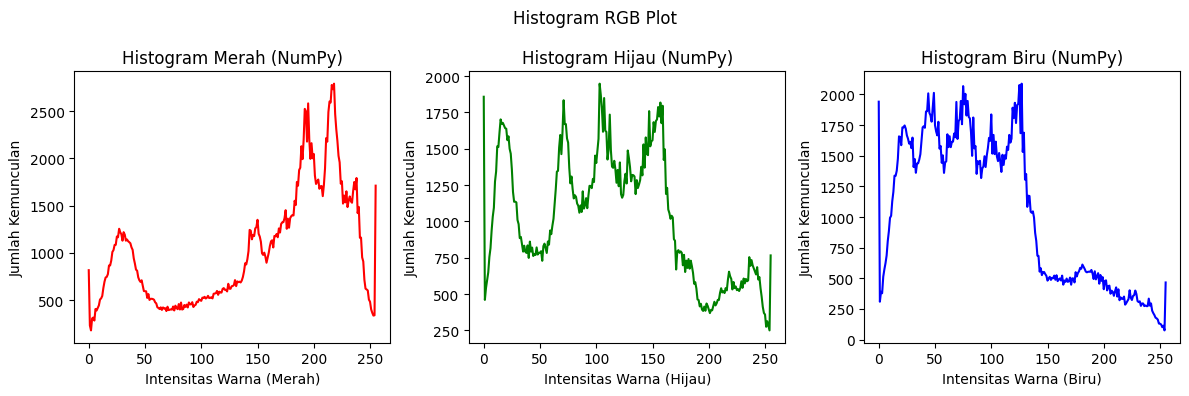

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar
image_path = '/content/drive/MyDrive/img_python/Images/lena.jpg'
image = cv2.imread(image_path)

# Pisahkan kanal warna (R, G, B)
b, g, r = cv2.split(image)

# Menghitung histogram untuk masing-masing kanal warna menggunakan NumPy
hist_r_np, bins_r_np = np.histogram(r.flatten(), 256, [0, 256])
hist_g_np, bins_g_np = np.histogram(g.flatten(), 256, [0, 256])
hist_b_np, bins_b_np = np.histogram(b.flatten(), 256, [0, 256])

# Membuat histogram citra untuk masing-masing kanal warna
plt.figure(figsize=(12, 4))
plt.suptitle('Histogram RGB Plot')  # Judul utama

# Plot histogram untuk kanal Merah (R) menggunakan NumPy
plt.subplot(131)
plt.plot(hist_r_np, color='red')
plt.ylabel('Jumlah Kemunculan')
plt.xlabel('Intensitas Warna (Merah)')
plt.title('Histogram Merah (NumPy)')

# Plot histogram untuk kanal Hijau (G) menggunakan NumPy
plt.subplot(132)
plt.plot(hist_g_np, color='green')
plt.ylabel('Jumlah Kemunculan')
plt.xlabel('Intensitas Warna (Hijau)')
plt.title('Histogram Hijau (NumPy)')

# Plot histogram untuk kanal Biru (B) menggunakan NumPy
plt.subplot(133)
plt.plot(hist_b_np, color='blue')
plt.ylabel('Jumlah Kemunculan')
plt.xlabel('Intensitas Warna (Biru)')
plt.title('Histogram Biru (NumPy)')

plt.tight_layout()
plt.show()


## **Apakah output muncul sama?**
### **Jawab :**
* Iya, Kedua metode, baik menggunakan matplotlib maupun numpy, memberikan hasil yang sama dalam hal menampilkan histogram masing-masing kanal warna (R, G, B).
* Fungsi np.histogram dari NumPy digunakan untuk menghitung histogram dengan membagi rentang intensitas warna menjadi 256 bin (0-255) untuk setiap kanal warna.
* Pemilihan metode (matplotlib atau NumPy) dapat bergantung pada preferensi atau kebutuhan. NumPy memiliki keuntungan dalam kinerja dan kenyamanan saat bekerja dengan array dan data numerik. Namun, menggunakan matplotlib sering lebih fleksibel dalam menampilkan grafik dengan gaya dan pengaturan yang lebih kaya.

 5. Buatlah histogram citra seperti output histogram equalization dan juga tampilan gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)

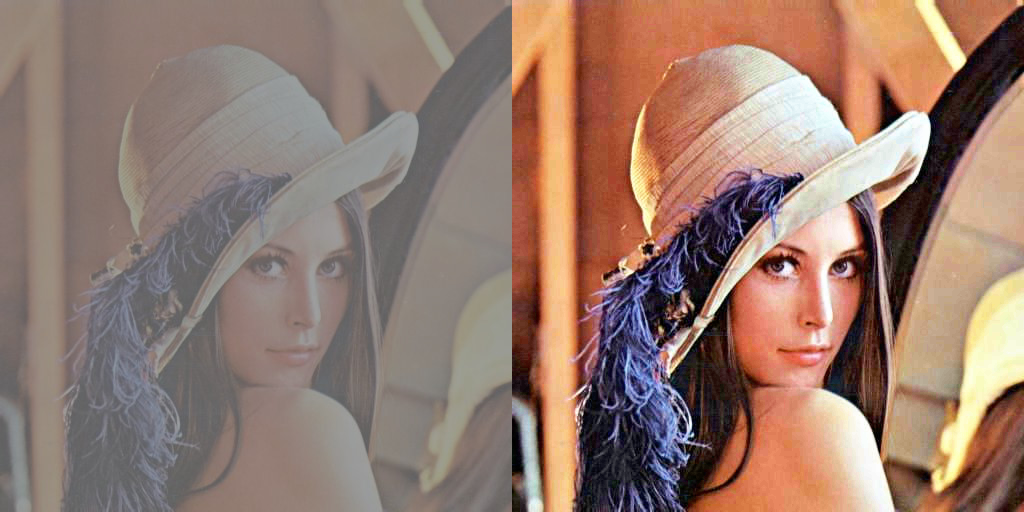

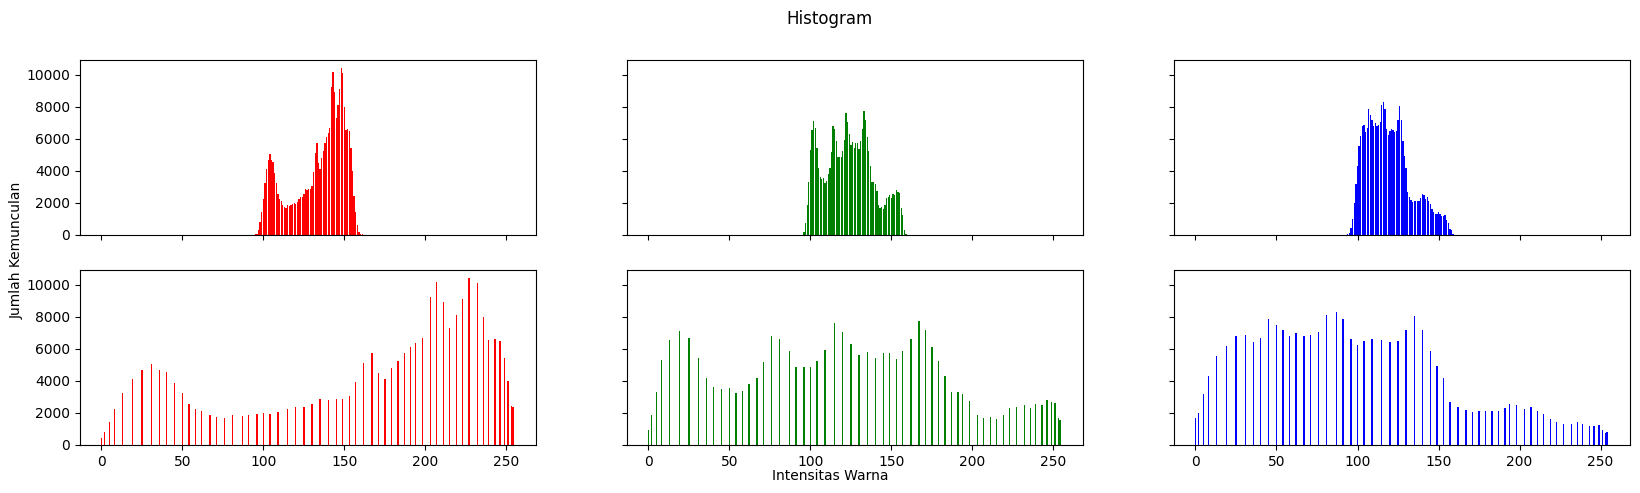

In [34]:
original_img = cv.imread('/content/drive/MyDrive/img_python/Images/lena_lc.jpg')
def histog(original_img):
  height, width, depth = np.shape(original_img)
  ax = np.zeros((3,256))
  for y in range(0,height) :
    for x in range(0,width) :
      ax[0][original_img[y][x][0]] += 1
      ax[1][original_img[y][x][1]] += 1
      ax[2][original_img[y][x][2]] += 1
  return ax

original_histogram = histog(original_img)


img_array = np.asarray(original_img)

# Step 1: Menghitung histogram normalisasi
# Melakukan flatten pada array gambar dan menghitung histogram dengan binning
histogram_array = np.bincount(img_array.flatten(), minlength=256)


num_pixels = np. sum(histogram_array)
histogram_array = histogram_array/num_pixels

# Menghitung histogram kumulatif normalisasi
chistogram_array = np.cumsum(histogram_array)

# Step 2: Membuat tabel pencocokan nilai piksel
transform_map = np.floor(255 * chistogram_array). astype (np.uint8)

# Step 3: Melakukan transformasi
# Mengubah array gambar menjadi list
img_list = list(img_array.flatten())

# Melakukan transformasi nilai piksel untuk melakukan ekualisasi
eq_img_list = [transform_map[p] for p in img_list]

# Mengubah kembali menjadi array dan reshape
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
image_eq = eq_img_array
# Menghitung histogram setelah ekualisasi
equal_histo = histog(image_eq)
# Menggabungkan gambar asli dan gambar setelah ekualisasi
final_frame = cv.hconcat((original_img, image_eq))
cv2_imshow(final_frame)

names = np.arange (256)

blue = [0]*256
green = [0]*256
red = [0]*256

isgrayimg = np.array_equal(blue, green, red)
# Menampilkan histogram
fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
# Menampilkan histogram warna dari gambar asli
axs[0,0].bar(names, original_histogram[2], color='red')
axs[0,1].bar(names, original_histogram[1], color='green')
axs[0,2].bar(names, original_histogram[0], color='blue')
# Menampilkan histogram warna setelah ekualisasi
axs[1,0].bar(names, equal_histo[2], color='red')
axs[1,1].bar(names, equal_histo[1], color='green')
axs[1,2].bar(names, equal_histo[0], color='blue')

plt.show()

 6. Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan hasilnya. Apakah output muncul sama?

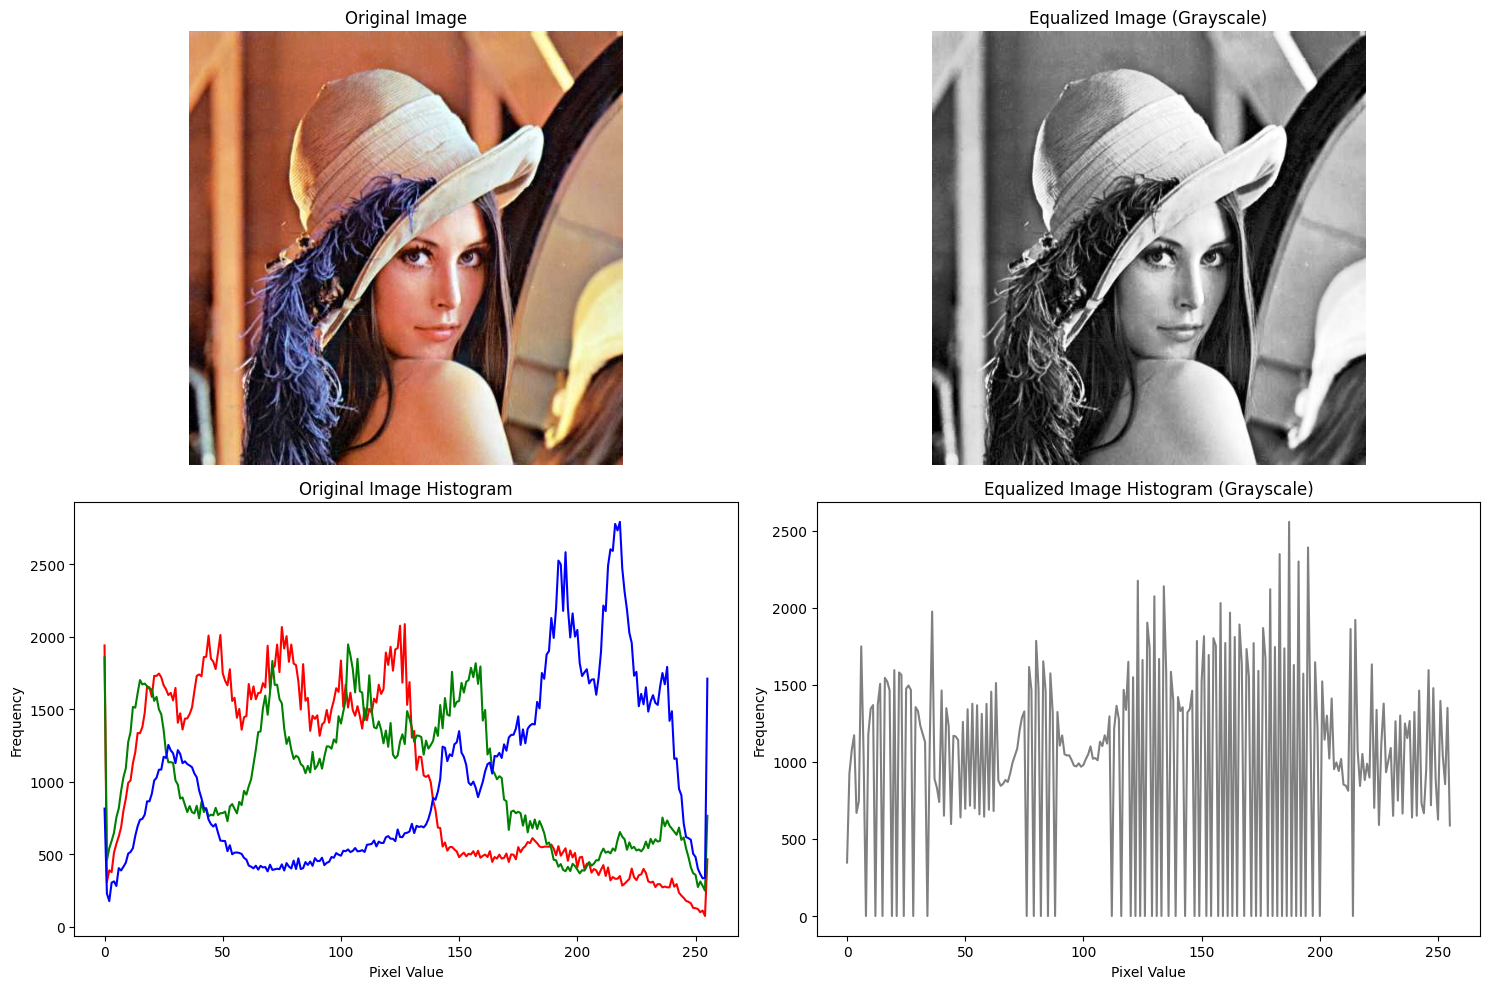

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img1 = cv2.imread('/content/drive/MyDrive/img_python/Images/lena.jpg')

def calculate_histogram(img):
    histogram = np.zeros((3, 256), dtype=int)
    for i in range(3):
        histogram[i] = np.histogram(img[..., i], bins=256, range=[0, 256])[0]
    return histogram

histo_asli = calculate_histogram(img1)

img_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img_eq_gray = cv2.equalizeHist(img_gray)

final_frame = cv2.hconcat((img1, cv2.cvtColor(img_eq_gray, cv2.COLOR_GRAY2BGR)))

fig, axs = plt.subplots(2, 2, figsize=[15, 10])
axs[0, 0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

axs[0, 1].imshow(cv2.cvtColor(img_eq_gray, cv2.COLOR_BGR2RGB))
axs[0, 1].set_title('Equalized Image (Grayscale)')
axs[0, 1].axis('off')

axs[1, 0].plot(histo_asli[0], color='red')
axs[1, 0].plot(histo_asli[1], color='green')
axs[1, 0].plot(histo_asli[2], color='blue')
axs[1, 0].set_title('Original Image Histogram')
axs[1, 0].set_xlabel('Pixel Value')
axs[1, 0].set_ylabel('Frequency')

histo_eq_gray = np.histogram(img_eq_gray, bins=256, range=[0, 256])[0]
axs[1, 1].plot(histo_eq_gray, color='gray')
axs[1, 1].set_title('Equalized Image Histogram (Grayscale)')
axs[1, 1].set_xlabel('Pixel Value')
axs[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()
